In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [3]:
x = torch.rand(5, 3)
print(x)

tensor([[0.6265, 0.2119, 0.6289],
        [0.9454, 0.6580, 0.3606],
        [0.1499, 0.4731, 0.4246],
        [0.9816, 0.5428, 0.0196],
        [0.9503, 0.7188, 0.2673]])


In [4]:
y = torch.ones(5, 3, dtype=torch.long)
print(y)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])


In [5]:
print(x+y)

tensor([[1.6265, 1.2119, 1.6289],
        [1.9454, 1.6580, 1.3606],
        [1.1499, 1.4731, 1.4246],
        [1.9816, 1.5428, 1.0196],
        [1.9503, 1.7188, 1.2673]])


In [6]:
print(x[:,1])

tensor([0.2119, 0.6580, 0.4731, 0.5428, 0.7188])


In [7]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [8]:
b = a.numpy()
print(b)
print(type(a), type(b))

[1. 1. 1. 1. 1.]
<class 'torch.Tensor'> <class 'numpy.ndarray'>


In [9]:
torch.cuda.is_available()

True

In [10]:
if torch.cuda.is_available():
  device = torch.device('cuda')
  y = torch.ones_like(x, device=device)
  x = x.to(device)
  z = x + y
  print(z)
  print(z.to("cpu", torch.double))

tensor([[1.6265, 1.2119, 1.6289],
        [1.9454, 1.6580, 1.3606],
        [1.1499, 1.4731, 1.4246],
        [1.9816, 1.5428, 1.0196],
        [1.9503, 1.7188, 1.2673]], device='cuda:0')
tensor([[1.6265, 1.2119, 1.6289],
        [1.9454, 1.6580, 1.3606],
        [1.1499, 1.4731, 1.4246],
        [1.9816, 1.5428, 1.0196],
        [1.9503, 1.7188, 1.2673]], dtype=torch.float64)


In [12]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))]
)

trainset = torchvision.datasets.FashionMNIST('data',
                                             download=True,
                                             train=True,
                                             transform=transform)

testset = torchvision.datasets.FashionMNIST('data',
                                             download=True,
                                             train=False,
                                             transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size = 64,
                                          shuffle=True,
                                          num_workers=10)

testloader = torch.utils.data.DataLoader(testset,
                                          batch_size = 64,
                                          shuffle=False,
                                          num_workers=10)

classes = ('티셔츠/탑' ,'Trouser', 'Pullover', '드레스', '코트',
           '샌들', '셔츠', '스니커즈', '가방', '앵클부츠')

def matplotlib_imshow(img, one_channel=False):
  if one_channel:
    img = img.mean(dim=0)
  img = img / 2 + 0.5
  npimg = img.numpy()
  if one_channel:
    plt.imshow(nping, cmap='Grays')
  else:
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


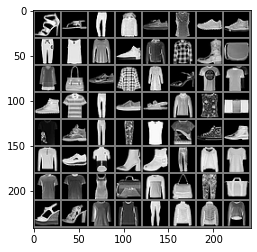

In [13]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

matplotlib_imshow(torchvision.utils.make_grid(images))

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    x = x.view(x.shape[0], -1)

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x), dim=1)

    return x    